In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
df =  pd.read_csv("equador_latest.csv")
df.head()

C:\Users\SOMESH\AppData\Local\Temp\ipykernel_10108\1544266577.py:1: DtypeWarning: Columns (22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,Unnamed: 16374,Unnamed: 16375,Unnamed: 16376,Unnamed: 16377,Unnamed: 16378,Unnamed: 16379,Unnamed: 16380,Unnamed: 16381,Unnamed: 16382,Unnamed: 16383
0,2022-11-17T04:19:50.756Z,-1.9207,-78.0808,141.391,5.2,mb,154.0,45.0,2.176,0.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-11-16T05:55:22.990Z,-1.5345,-77.5119,178.401,4.5,mb,37.0,149.0,1.995,0.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-11-09T01:15:09.397Z,-4.2204,-80.5016,42.705,5.1,mww,48.0,136.0,8.501,0.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-11-02T05:06:44.174Z,-2.3678,-77.2923,145.724,4.6,mb,41.0,70.0,2.670,1.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-11-01T04:19:50.756Z,-1.8207,-79.0808,141.391,5.2,mb,154.0,45.0,2.176,0.66,...,2022-11-17T04:19:50.756Z,2022-11-17T04:19:50.756Z,2022-11-17T04:19:50.756Z,2022-11-17T04:19:50.756Z,2022-11-17T04:19:50.756Z,2022-11-17T04:19:50.756Z,2022-11-17T04:19:50.756Z,2022-11-17T04:19:50.756Z,2022-11-17T04:19:50.756Z,2022-11-17T04:19:50.756Z


In [3]:
df_part = df[["time","mag"]]
df_part.head()

,time,mag
0,2022-11-17T04:19:50.756Z,5.2
1,2022-11-16T05:55:22.990Z,4.5
2,2022-11-09T01:15:09.397Z,5.1
3,2022-11-02T05:06:44.174Z,4.6
4,2022-11-01T04:19:50.756Z,5.2


In [4]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)

### Histogram of the data 

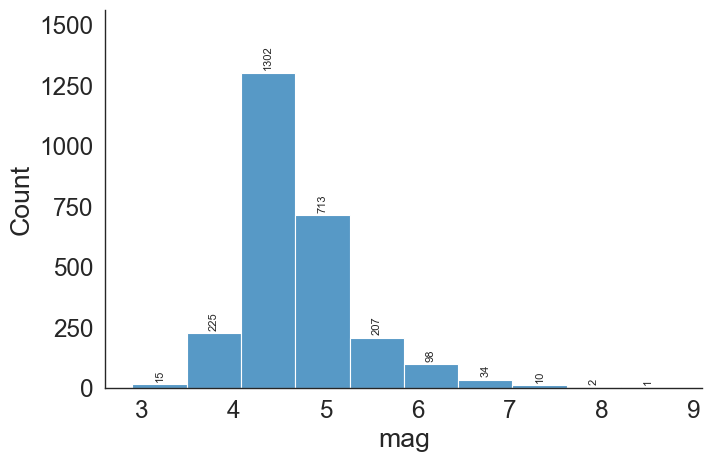

In [5]:
fg = sns.displot(data=df_part, x="mag", kind="hist", bins = 10, aspect = 1.5,stat="count")

for ax in fg.axes.ravel():
    
    # add annotations
    for c in ax.containers:

        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{w}' if (w := v.get_height()) > 0 else '' for v in c]

        ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=90, padding=2)
    
    ax.margins(y=0.2)

plt.show()

### poisson ditribution

[6, 4, 15, 40, 78, 389, 502, 508, 336, 226, 195, 85, 61, 36, 35, 38, 21, 11, 8, 5, 2, 3, 2, 0, 0, 0, 1]


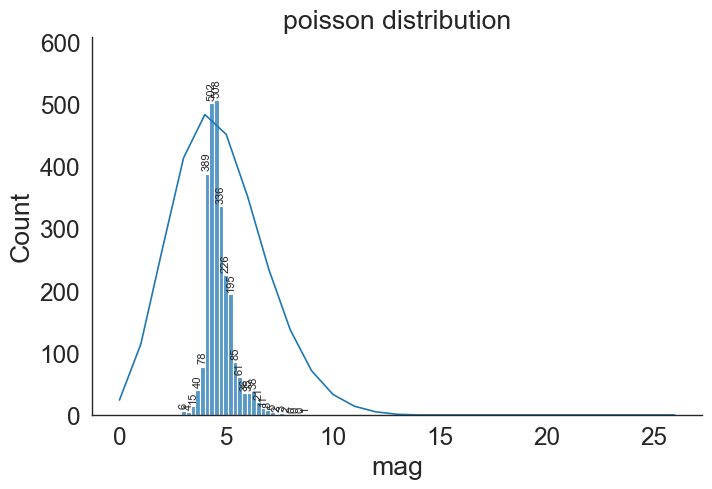

In [6]:

fg = sns.displot(data=df_part, x="mag", kind="hist", bins =int(1+3.322*np.log(len(df_part))) , aspect = 1.5,stat="count")

for ax in fg.axes.ravel():
    
    # add annotations
    for c in ax.containers:

        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [w if (w := v.get_height()) > 0 else 0 for v in c]
        
        print(labels)
        ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=90, padding=2)
    
    ax.margins(y=0.2)



lmbda = df_part.mag.mean()
import math
bins = int(1+3.322*np.log(len(df_part)))
def poisson_distribution(n,x,lmbda):
    return n*(lmbda ** x)*np.exp(lmbda*-1)/math.factorial(x)

#[poisson_distribution(len(df_part),x,lmbda) for x in labels]

expected_values = [int(poisson_distribution(len(df_part),x,lmbda)) for x in range(bins)]
# dist_fig = plt.plot(expected_values)



plt.plot(expected_values)
plt.title("poisson distribution")
plt.show()

###  distributions


Fitting 5 distributions: 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


Text(0.01, 0.4, 'Probability Values')

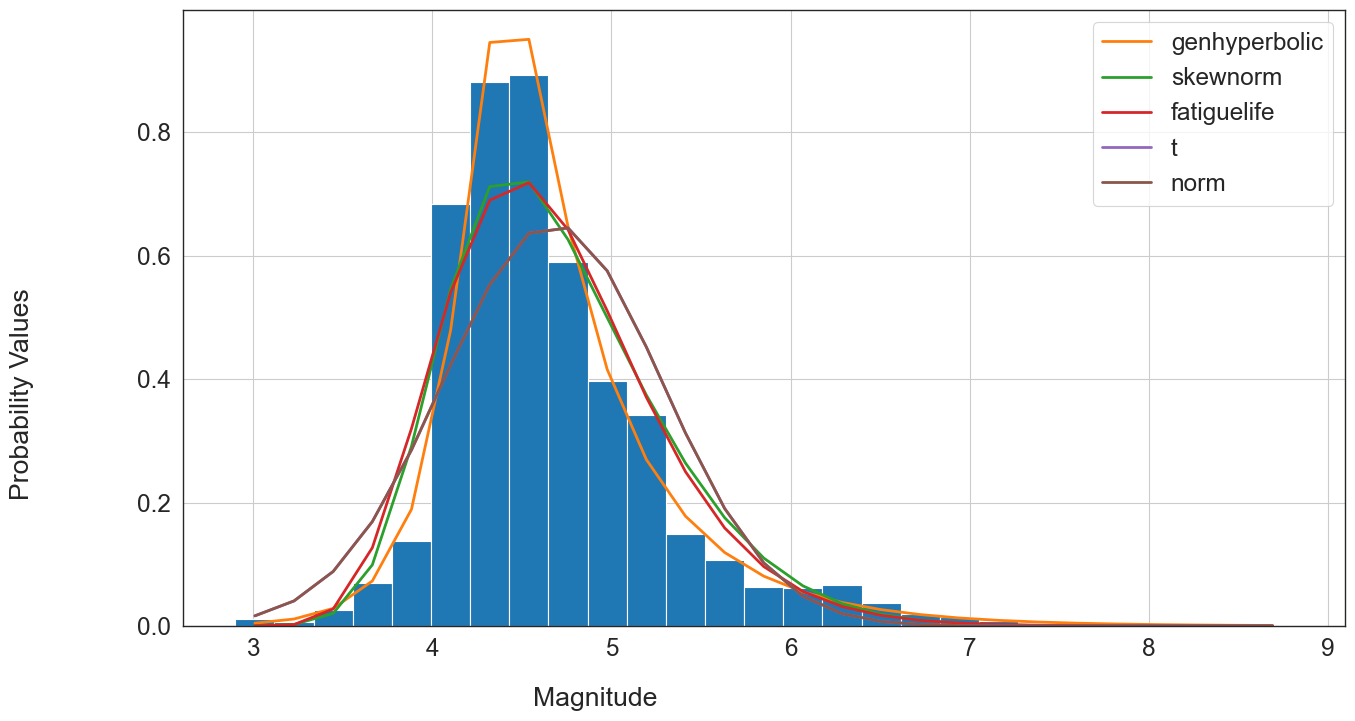

In [7]:
mag = df.mag.values 

f = Fitter(mag, bins=int(1+3.322*np.log(len(df_part))),
           distributions=["fatiguelife","genhyperbolic","norm","skewnorm","t"])
f.fit()
fig, axes = plt.subplots( figsize=(15,8))
f.summary()

fig.text(0.4, 0.01, 'Magnitude', ha='center')
fig.text(0.01, 0.4, 'Probability Values', va='center', rotation='vertical')

In [8]:
f.get_best()

{'genhyperbolic': {'p': 0.3165926716644607,
  'a': 0.6996498216544804,
  'b': 0.3220254654674253,
  'loc': 4.353029683900523,
  'scale': 0.2753835515648816}}

<AxesSubplot: title={'center': 'Fitted $\\tt nbinom$ PMF and Histogram'}, xlabel='k', ylabel='PMF'>

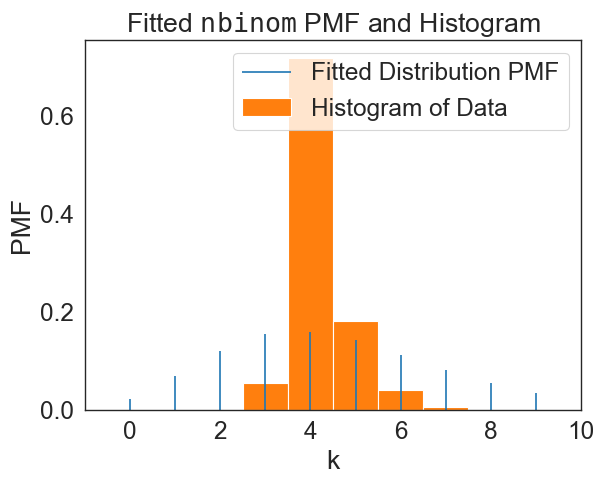

In [9]:
from scipy.stats import fit

from scipy.stats import nbinom, poisson, genhyperbolic

data = df.mag.values

res = fit(dist=nbinom, data=data, bounds=[(0,10), (0,1)] ,method='mle')

res.plot()


<AxesSubplot: title={'center': 'Fitted $\\tt poisson$ PMF and Histogram'}, xlabel='k', ylabel='PMF'>

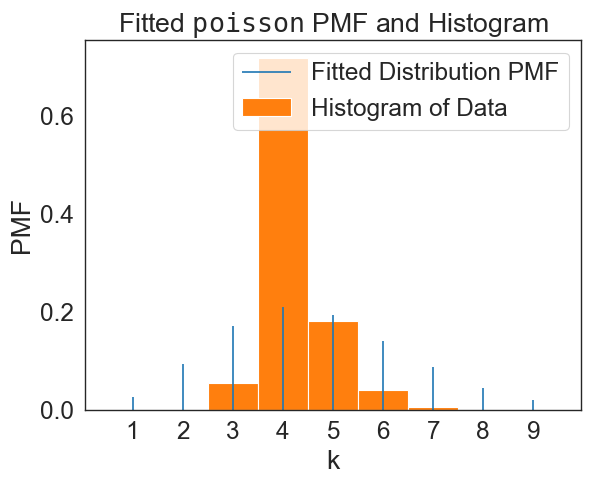

In [10]:
res = fit(dist=poisson, data=data, bounds=[(0,10), (0,1)] ,method='mle')

res.plot()

In [18]:
mu = df_part.mag.mean()

poisson_prob = poisson.pmf(df_part.mag, mu)

print(poisson_prob)
# nbinom_prob = nbinom.pmf(k,n,p)

'''question
1. nbinom ho to get n and p

2. pmf values are zero
'''



[0. 0. 0. ... 0. 0. 0.]


'question\n\n1. is mu is mean of values?--- yes\n\n2. nbinom ho to get n and p\n\n3. pmf values are zero\n'

[6, 4, 15, 40, 78, 389, 502, 508, 336, 226, 195, 85, 61, 36, 35, 38, 21, 11, 8, 5, 2, 3, 2, 0, 0, 0, 1]


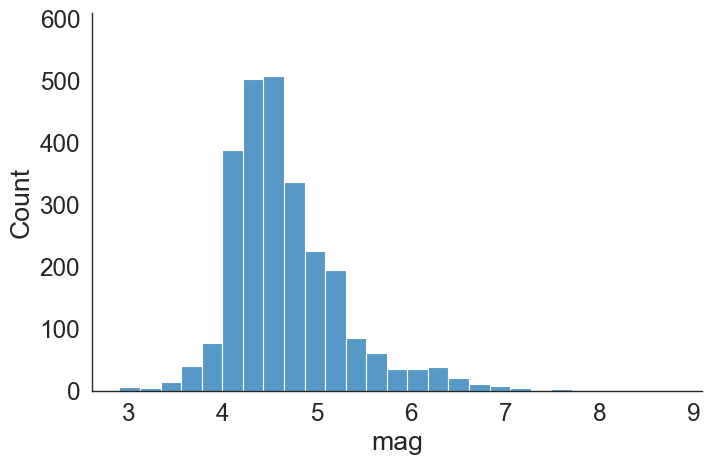

In [82]:
bins = int(1+3.322*np.log(len(df_part)))

fg = sns.displot(data=df_part, x="mag", kind="hist", bins =bins , aspect = 1.5,stat="count")

for ax in fg.axes.ravel():
    
    # add annotations
    for c in ax.containers:

        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [w if (w := v.get_height()) > 0 else 0 for v in c]
        
        print(labels)
        # ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=90, padding=2)
    
    ax.margins(y=0.2)



# lmbda = df_part.mag.mean()
# import math
# bins = int(1+3.322*np.log(len(df_part)))

In [81]:
## https://vitalflux.com/poisson-distribution-explained-with-python-examples/
### labels are the freuencies of the earthquake
### mean of the above frequencies

lamda = np.mean(labels)

poisson_pd = poisson.pmf(labels, lamda)


Text(0.5, 1.0, 'Poisson Distribution - No. of earthquakes Vs Probability')

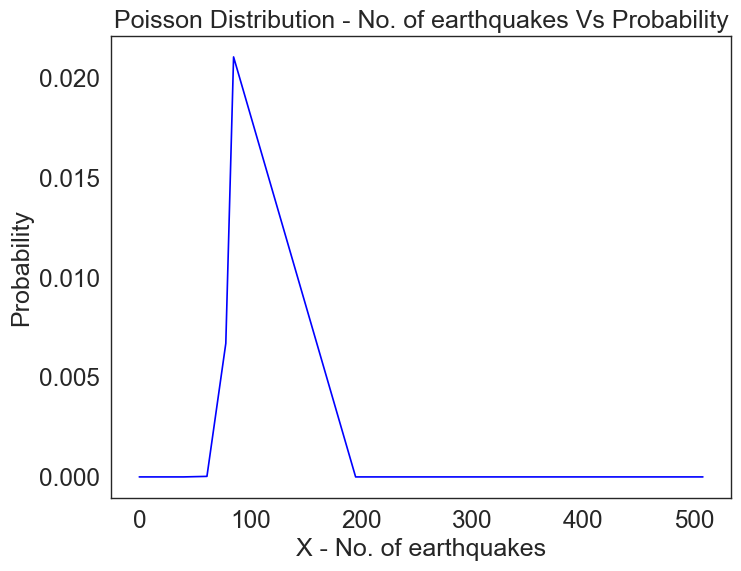

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
xp,yp = zip(*sorted(zip(labels,poisson_pd),key = lambda x:x[0]))
ax.plot(xp,yp, 'b-', ms=8, label='poisson pmf')
plt.ylabel("Probability", fontsize="18")
plt.xlabel("X - No. of earthquakes", fontsize="18")
plt.title("Poisson Distribution - No. of earthquakes Vs Probability", fontsize="18")
# ax.vlines(labels, 0, poisson_pd, colors='b', lw=5, alpha=0.5)


In [66]:
# https://vitalflux.com/negative-binomial-distribution-python-examples/

In [85]:
mu = np.mean(labels)
var = np.var(labels)
p = mu / var
n = (mu * mu)/(var-mu)
nbinom_pd = nbinom.pmf(labels,n,p)


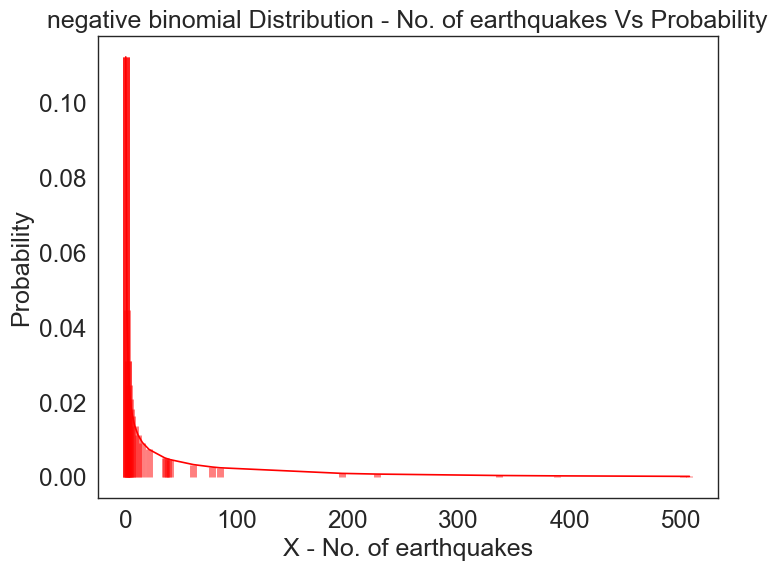

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
x,y = zip(*sorted(zip(labels,nbinom_pd),key = lambda x:x[0]))
ax.plot(x,y, 'r-', ms=8, label='poisson pmf')
plt.ylabel("Probability", fontsize="18")
plt.xlabel("X - No. of earthquakes", fontsize="18")
plt.title("negative binomial Distribution - No. of earthquakes Vs Probability", fontsize="18")
ax.vlines(labels, 0, nbinom_pd, colors='r', lw=5, alpha=0.5)


Fitting 1 distributions: 100%|██████████| 1/1 [00:03<00:00,  3.00s/it]


Text(0.01, 0.4, 'Probability Values')

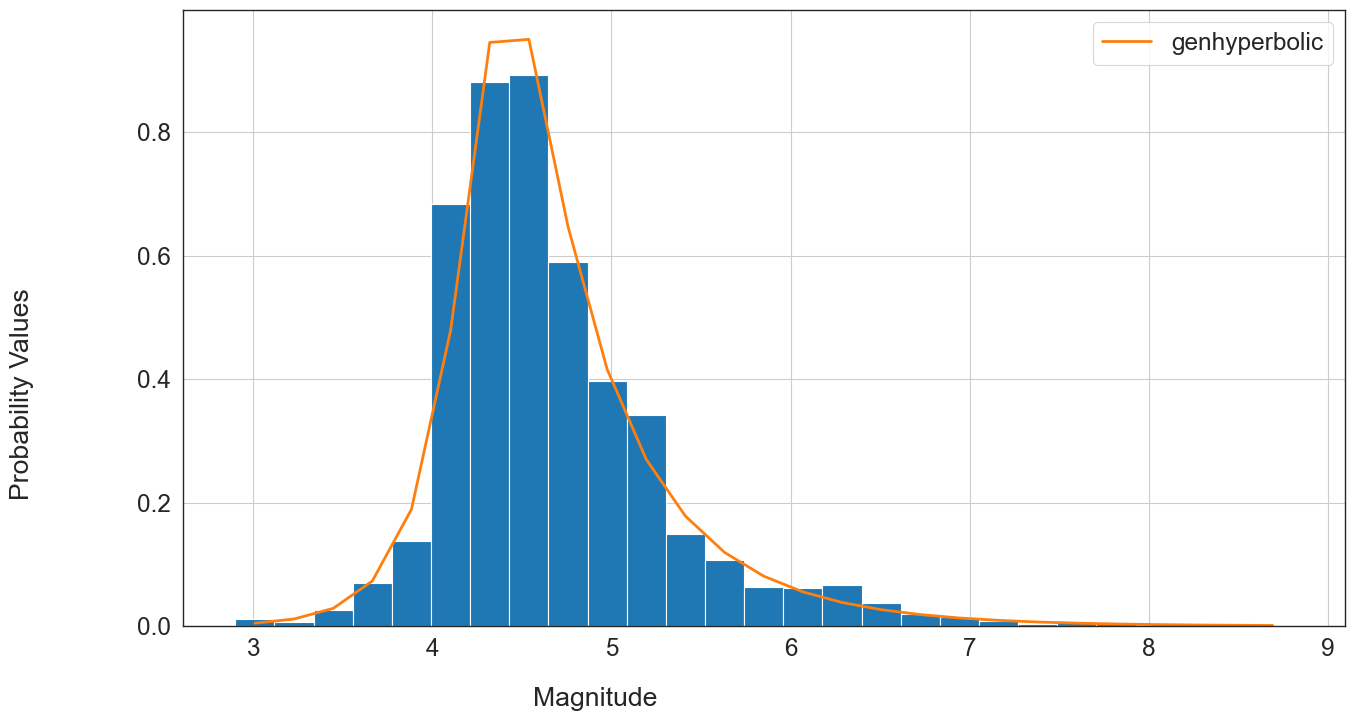

In [80]:
mag = df.mag.values 

f = Fitter(mag, bins=int(1+3.322*np.log(len(df_part))),
           distributions=["genhyperbolic"])
f.fit()
fig, axes = plt.subplots( figsize=(15,8))
f.summary()

fig.text(0.4, 0.01, 'Magnitude', ha='center')
fig.text(0.01, 0.4, 'Probability Values', va='center', rotation='vertical')

In [ ]:

# fg = sns.displot(data=df_part, x="mag", kind="hist", bins =int(1+3.322*np.log(len(df_part))) , aspect = 1.5,stat="count")

# for ax in fg.axes.ravel():
    
#     # add annotations
#     for c in ax.containers:

#         # custom label calculates percent and add an empty string so 0 value bars don't have a number
#         labels = [w if (w := v.get_height()) > 0 else 0 for v in c]
        
#         print(labels)
#         ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=90, padding=2)
    
#     ax.margins(y=0.2)



# lmbda = df_part.mag.mean()
# import math
# bins = int(1+3.322*np.log(len(df_part)))
# def poisson_distribution(n,x,lmbda):
#     return n*(lmbda ** x)*np.exp(lmbda*-1)/math.factorial(x)

# #[poisson_distribution(len(df_part),x,lmbda) for x in labels]

# expected_values = [int(poisson_distribution(len(df_part),x,lmbda)) for x in range(bins)]
# # dist_fig = plt.plot(expected_values)



# plt.plot(expected_values)
# plt.title("poisson distribution")
# plt.show()

In [33]:
# import statistics
# mean_val =df_part.mag.mean()
# var_val = statistics.pvariance(df_part.mag)

# p = mean_val/var_val
# print(mean_val, var_val,p)
# # q= 1-p
# # k = mean_val*p/q


# # p_0 = p**k
# # n= len(df_part)

# # def negative_binomial_distribution(p,q,k,p_0,n):
    
# #     expected_values = [p_0]
# #     for x in range(1,11):
# #         inter_val = (x+k)*q/(x+1)
# #         prob_prev = p_0
# #         prob_next =int(n*inter_val * prob_prev)

# #         prob_prev = prob_next
        
        
# #         expected_values.append(prob_prev)
# #     return expected_values

# # a = negative_binomial_distribution(p,q,k,p_0,n)
# # print(a)


In [31]:
# mag = df.mag.values

# f = Fitter(mag,
#            distributions=["fatiguelife"])
# f.fit()
# f.summary()

In [32]:
# from scipy.optimize import curve_fit
# from scipy.special import factorial
# from scipy.stats import poisson